In [17]:
import warnings
from datetime import datetime


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/data.csv")

In [3]:
df.head(13)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,ELEGPUS,197301,159.913,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours
1,ELEGPUS,197302,143.257,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours
2,ELEGPUS,197303,147.847,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours
3,ELEGPUS,197304,139.292,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours
4,ELEGPUS,197305,147.088,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours
5,ELEGPUS,197306,160.945,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours
6,ELEGPUS,197307,173.467,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours
7,ELEGPUS,197308,177.109,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours
8,ELEGPUS,197309,156.651,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours
9,ELEGPUS,197310,153.954,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours


In [4]:
to_remove = df.loc[
    df["YYYYMM"].astype(str).str.endswith("13"),
    :
].index

In [5]:
df.drop(index=to_remove, inplace=True)

In [6]:
df.shape

(582, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 629
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           582 non-null    object 
 1   YYYYMM        582 non-null    int64  
 2   Value         582 non-null    float64
 3   Column_Order  582 non-null    int64  
 4   Description   582 non-null    object 
 5   Unit          582 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 31.8+ KB


In [8]:
df["Unit"].unique()

array(['Billion Kilowatthours'], dtype=object)

In [9]:
df["YYYYMM"] = pd.to_datetime(df["YYYYMM"].astype(str), format="%Y%m")

In [10]:
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,ELEGPUS,1973-01-01,159.913,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours
1,ELEGPUS,1973-02-01,143.257,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours
2,ELEGPUS,1973-03-01,147.847,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours
3,ELEGPUS,1973-04-01,139.292,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours
4,ELEGPUS,1973-05-01,147.088,1,"Electricity Net Generation, Electric Power Sector",Billion Kilowatthours


In [11]:
test_start_date = datetime(2015, 1, 1)

In [13]:
train_df = df.loc[df["YYYYMM"] < test_start_date, :]
test_df = df.loc[df["YYYYMM"] >= test_start_date, :]

In [14]:
train_df.shape, test_df.shape

((504, 6), (78, 6))

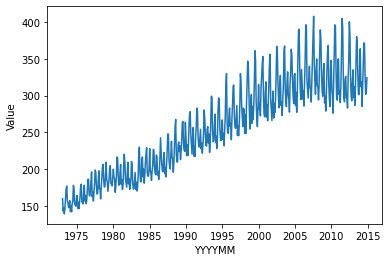

In [13]:
sns.lineplot(x="YYYYMM", y="Value", data=train_df);

In [19]:
train_df["month_number"] = train_df["YYYYMM"].dt.year * 12 + train_df["YYYYMM"].dt.month
test_df["month_number"] = test_df["YYYYMM"].dt.year * 12 + test_df["YYYYMM"].dt.month

In [20]:
train_df["month_number"].min()

23677

In [21]:
min_month = train_df["month_number"].min()

train_df["month_number"] -= min_month + 1
test_df["month_number"] -= min_month + 1

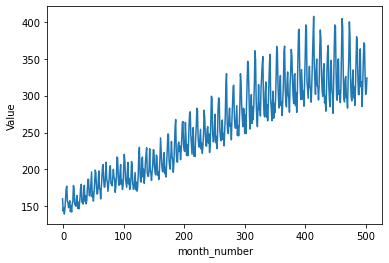

In [22]:
sns.lineplot(x="month_number", y="Value", data=train_df);

In [16]:
model = LinearRegression()

In [23]:
features = ["month_number"]

In [24]:
model.fit(train_df[features], train_df["Value"])

LinearRegression()

In [25]:
prediction_train = model.predict(train_df[features])
prediction_test = model.predict(test_df[features])

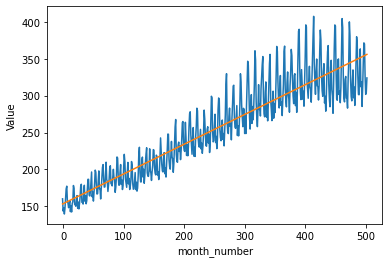

In [26]:
sns.lineplot(x="month_number", y="Value", data=train_df);
sns.lineplot(x=train_df["month_number"], y=prediction_train);

In [28]:
mean_squared_error(train_df["Value"], prediction_train)

672.7117351621268

In [30]:
mean_absolute_error(train_df["Value"], prediction_train)

19.838967793357163

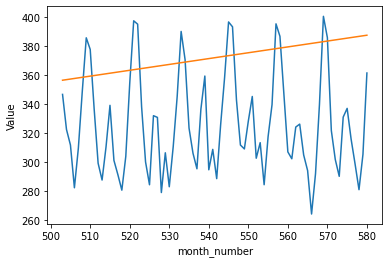

In [27]:
sns.lineplot(x="month_number", y="Value", data=test_df);
sns.lineplot(x=test_df["month_number"], y=prediction_test);

In [29]:
mean_squared_error(test_df["Value"], prediction_test)

3397.2583639052323

In [31]:
mean_absolute_error(test_df["Value"], prediction_test)

51.513472887372025

In [32]:
train_df["YYYYMM"]

0     1973-01-01
1     1973-02-01
2     1973-03-01
3     1973-04-01
4     1973-05-01
         ...    
540   2014-08-01
541   2014-09-01
542   2014-10-01
543   2014-11-01
544   2014-12-01
Name: YYYYMM, Length: 504, dtype: datetime64[ns]

In [34]:
for i in range(1, 13):
    train_df[f"Value_{i}_month_before"] = train_df["Value"].shift(i)

In [35]:
value_columns = [col for col in train_df.columns if col.startswith("Value")]

In [36]:
train_df[value_columns].head()

,Value,Value_1_month_before,Value_2_month_before,Value_3_month_before,Value_4_month_before,Value_5_month_before,Value_6_month_before,Value_7_month_before,Value_8_month_before,Value_9_month_before,Value_10_month_before,Value_11_month_before,Value_12_month_before
0,159.913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,143.257,159.913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,147.847,143.257,159.913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,139.292,147.847,143.257,159.913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,147.088,139.292,147.847,143.257,159.913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
train_df.iloc[12:][value_columns].corr()

,Value,Value_1_month_before,Value_2_month_before,Value_3_month_before,Value_4_month_before,Value_5_month_before,Value_6_month_before,Value_7_month_before,Value_8_month_before,Value_9_month_before,Value_10_month_before,Value_11_month_before,Value_12_month_before
Value,1.000000,0.928929,0.837980,0.778664,0.793415,0.855148,0.873863,0.856194,0.794874,0.779915,0.838802,0.924808,0.986991
Value_1_month_before,0.928929,1.000000,0.929299,0.838697,0.779276,0.793764,0.855604,0.874187,0.856738,0.796127,0.780644,0.839415,0.925275
Value_2_month_before,0.837980,0.929299,1.000000,0.929608,0.839381,0.780288,0.794891,0.856363,0.874769,0.857583,0.797035,0.781668,0.840543
Value_3_month_before,0.778664,0.838697,0.929608,1.000000,0.929999,0.840493,0.781536,0.795844,0.856992,0.875429,0.858221,0.797929,0.782949
Value_4_month_before,0.793415,0.779276,0.839381,0.929999,1.000000,0.930337,0.840863,0.781925,0.796538,0.857934,0.875795,0.858709,0.798367
Value_5_month_before,0.855148,0.793764,0.780288,0.840493,0.930337,1.000000,0.930088,0.840693,0.782594,0.798222,0.858369,0.876394,0.858286
Value_6_month_before,0.873863,0.855604,0.794891,0.781536,0.840863,0.930088,1.000000,0.930114,0.841456,0.784448,0.798755,0.859089,0.876048
Value_7_month_before,0.856194,0.874187,0.856363,0.795844,0.781925,0.840693,0.930114,1.000000,0.930493,0.842739,0.784988,0.799416,0.859080
Value_8_month_before,0.794874,0.856738,0.874769,0.856992,0.796538,0.782594,0.841456,0.930493,1.000000,0.931011,0.843347,0.785892,0.800281
Value_9_month_before,0.779915,0.796127,0.857583,0.875429,0.857934,0.798222,0.784448,0.842739,0.931011,1.000000,0.931604,0.844342,0.787788


In [37]:
train_df["Value_diff"] = train_df["Value"] - train_df["Value_12_month_before"]

In [38]:
value_columns = [col for col in train_df.columns if col.startswith("Value")]

In [39]:
train_df.iloc[12:][value_columns].corr()

,Value,Value_1_month_before,Value_2_month_before,Value_3_month_before,Value_4_month_before,Value_5_month_before,Value_6_month_before,Value_7_month_before,Value_8_month_before,Value_9_month_before,Value_10_month_before,Value_11_month_before,Value_12_month_before,Value_diff
Value,1.000000,0.928929,0.837980,0.778664,0.793415,0.855148,0.873863,0.856194,0.794874,0.779915,0.838802,0.924808,0.986991,0.006492
Value_1_month_before,0.928929,1.000000,0.929299,0.838697,0.779276,0.793764,0.855604,0.874187,0.856738,0.796127,0.780644,0.839415,0.925275,-0.046402
Value_2_month_before,0.837980,0.929299,1.000000,0.929608,0.839381,0.780288,0.794891,0.856363,0.874769,0.857583,0.797035,0.781668,0.840543,-0.078309
Value_3_month_before,0.778664,0.838697,0.929608,1.000000,0.929999,0.840493,0.781536,0.795844,0.856992,0.875429,0.858221,0.797929,0.782949,-0.084600
Value_4_month_before,0.793415,0.779276,0.839381,0.929999,1.000000,0.930337,0.840863,0.781925,0.796538,0.857934,0.875795,0.858709,0.798367,-0.089847
Value_5_month_before,0.855148,0.793764,0.780288,0.840493,0.930337,1.000000,0.930088,0.840693,0.782594,0.798222,0.858369,0.876394,0.858286,-0.083162
Value_6_month_before,0.873863,0.855604,0.794891,0.781536,0.840863,0.930088,1.000000,0.930114,0.841456,0.784448,0.798755,0.859089,0.876048,-0.078619
Value_7_month_before,0.856194,0.874187,0.856363,0.795844,0.781925,0.840693,0.930114,1.000000,0.930493,0.842739,0.784988,0.799416,0.859080,-0.081670
Value_8_month_before,0.794874,0.856738,0.874769,0.856992,0.796538,0.782594,0.841456,0.930493,1.000000,0.931011,0.843347,0.785892,0.800281,-0.092782
Value_9_month_before,0.779915,0.796127,0.857583,0.875429,0.857934,0.798222,0.784448,0.842739,0.931011,1.000000,0.931604,0.844342,0.787788,-0.107009


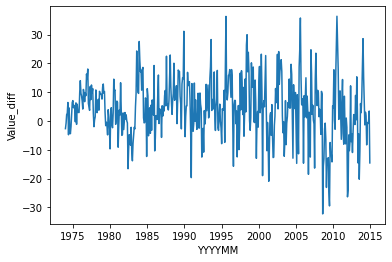

In [40]:
sns.lineplot(x="YYYYMM", y="Value_diff", data=train_df);

In [41]:
model = LinearRegression()
model.fit(train_df.iloc[12:][["month_number"]], train_df.iloc[12:]["Value_diff"])

LinearRegression()

In [42]:
prediction_train = model.predict(train_df[["month_number"]].iloc[12:])
prediction_test = model.predict(test_df[["month_number"]])

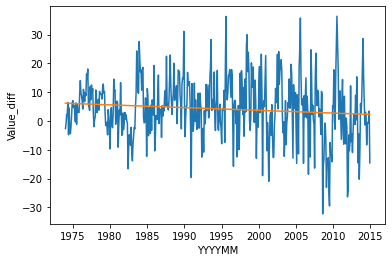

In [43]:
sns.lineplot(x="YYYYMM", y="Value_diff", data=train_df.iloc[12:]);
sns.lineplot(x=train_df["YYYYMM"].iloc[12:], y=prediction_train);

In [44]:
prediction_train_total = (
    prediction_train + 
    train_df["Value"].iloc[:-12]
)

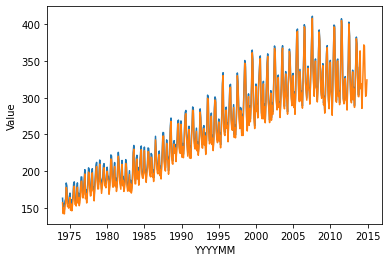

In [45]:
sns.lineplot(x=train_df["YYYYMM"].iloc[12:], y=prediction_train_total);
sns.lineplot(x="YYYYMM", y="Value", data=train_df.iloc[12:]);

In [46]:
mean_squared_error(train_df["Value"].iloc[12:], prediction_train_total)

104.10679045339914

In [47]:
mean_absolute_error(train_df["Value"].iloc[12:], prediction_train_total)

7.731972086495701

In [48]:
prediction_test.shape

(78,)

In [50]:
prediction_test_padded

array([2.26690185, 2.2589781 , 2.25105436, 2.24313061, 2.23520686,
       2.22728311, 2.21935936, 2.21143562, 2.20351187, 2.19558812,
       2.18766437, 2.17974063, 2.17181688, 2.16389313, 2.15596938,
       2.14804563, 2.14012189, 2.13219814, 2.12427439, 2.11635064,
       2.10842689, 2.10050315, 2.0925794 , 2.08465565, 2.0767319 ,
       2.06880816, 2.06088441, 2.05296066, 2.04503691, 2.03711316,
       2.02918942, 2.02126567, 2.01334192, 2.00541817, 1.99749443,
       1.98957068, 1.98164693, 1.97372318, 1.96579943, 1.95787569,
       1.94995194, 1.94202819, 1.93410444, 1.92618069, 1.91825695,
       1.9103332 , 1.90240945, 1.8944857 , 1.88656196, 1.87863821,
       1.87071446, 1.86279071, 1.85486696, 1.84694322, 1.83901947,
       1.83109572, 1.82317197, 1.81524822, 1.80732448, 1.79940073,
       1.79147698, 1.78355323, 1.77562949, 1.76770574, 1.75978199,
       1.75185824, 1.74393449, 1.73601075, 1.728087  , 1.72016325,
       1.7122395 , 1.70431576, 1.69639201, 1.68846826, 1.68054

In [63]:
to_pad = (12 - prediction_test.shape[0] % 12)


prediction_test_padded = np.append(prediction_test, np.zeros(to_pad))

prediction_test_total_padded = (
    prediction_test_padded.reshape(-1, 12).cumsum(0) + 
    train_df["Value"].iloc[-12:].values.reshape(1, -1)
).flatten()

In [64]:
prediction_test_total = prediction_test_total_padded[:-to_pad]

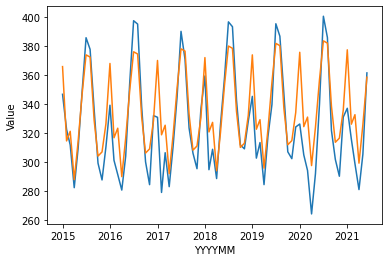

In [65]:
sns.lineplot(x="YYYYMM", y="Value", data=test_df);
sns.lineplot(x=test_df["YYYYMM"], y=prediction_test_total);

In [66]:
mean_squared_error(test_df["Value"], prediction_test_total)

330.0379670022676

In [67]:
mean_absolute_error(test_df["Value"], prediction_test_total)

14.678326718236134